In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# 1. Interpretation and significance
Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 = 873+0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 + 0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2 − 223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠

expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

What is not given is the statistical significance of the coefficients. T-tests and p-values should be considered.

Interpretation??

People who have kids spend on average \$224 less than people who do not have kids. This does not make logical sense. ??

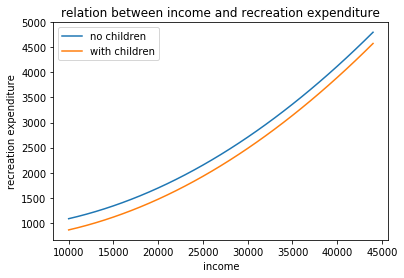

In [2]:
# X represents annual income
X = np.arange(10000, 45000, 1000)

# Y represents annual expenditure on recreation for families with no children
Y = 873 + (0.0012*X) + (0.000002*(X**2))

# Y_kids represents annual expenditure on recreation for families with children
Y_kids = (873 - 223.57) + (0.0012*X) + (0.000002*(X**2))

plt1 = plt.plot(X, Y, label="no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("relation between income and recreation expenditure")
plt.legend()
plt.show()


------------------------------------


# 2. Weather model

1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
3. Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [3]:
# import dataset
df_w = pd.read_csv(r'C:\Users\AP\Desktop/weatherHistory.csv')

# columns to lower case
df_w.columns = map(str.lower, df_w.columns)

# rename columns/fix typos
df_w.columns = ['date', 'summary', 'precip type', 'temp',
       'apparent temp', 'humidity', 'windspeed',
       'windbearing', 'visibility', 'cloud cover',
       'pressure', 'daily summary']

In [4]:
# Y is the target variable
Y = df_w['apparent temp'] - df_w['temp']
# X is the feature set
X = df_w[['humidity','windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:22   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All three features sport p-values of zero, making them all statistically significant. As humidity increases by 1 point, the difference between apparent temperature and actual temperature decreases 3 degrees. This surprises me a little. Personally, very humid areas like Florida feel much hotter than the actual measured temperature. The statistics here contradict what it actually feels like to the senses.

A 1 point increase in windspeed equates to a 0.12 degree drop in the target variable.

In [5]:
# interaction between humidity and windspeed (multiplication)
df_w['humidity_windspeed_interaction'] = df_w.humidity * df_w.windspeed

# Y is the target variable
Y = df_w['apparent temp'] - df_w['temp']
# X is the feature set
X = df_w[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:27   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the features are statistically significant and have zero p-values. 

There was a change in humidity's estimated coefficient. In the previous model, a 1 point increase in humidity decreased the target variable by a few degrees. After adding the new feature, a 1 point increase in humidity basically does not change the target variable, only increasing it by 0.18 degrees.

There was very little change in the estimated coefficient of windspeed. 

The humidity_windspeed_interaction is statistically significant, however, a 1 point increase in it only accounts for a meager decrease in the target variable by 0.3 degrees.

-------------------------------------------


# 3. House prices model

1. Load the houseprices data from Thinkful's database.
2. Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
3. Now, exclude the insignificant features from your model. Did anything change?
4. Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
5. Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [6]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Downloads\house prices.csv')

# columns to lower case
df.columns = map(str.lower, df.columns)

# list/number of numerical columns
num_col = df.select_dtypes(['int64', 'float64']).columns

# list/number of alpha columns
alpha_col = df.select_dtypes(['object']).columns

# convert alpha features to binary
df['mszoning'] = pd.get_dummies(df.mszoning, drop_first=True)
df['neighborhood'] = pd.get_dummies(df.neighborhood, drop_first=True)
df['exterior1st'] = pd.get_dummies(df.exterior1st, drop_first=True)

In [7]:
# define variables for model
X = df[['overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st']]
Y = df.saleprice

# linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates coefficients using OLS
lrm.fit(X, Y)

# results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 27376.46862964     50.29076183  21328.1723526   -8029.30492406
 -39911.74536606 -21032.87386767]

Intercept: 
 -99533.29696331921


In [8]:
# OLS parameters
# create constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     688.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:37   Log-Likelihood:                -17561.
No. Observations:                1460   AIC:                         3.514e+04
Df Residuals:                    1453   BIC:                         3.517e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.953e+04   4872.194    -20.429      0.000   -1.09e+05      -9e+04
overallqual   2.738e+04   1087.034     25.185      0.000    2.52e+04    2.95e+04
grlivarea       50.2908      2.565     19.607      0.000      45.259      55.322
garagecars    2.133e+04   1810.777     11.778      0.000    1.78e+04    2.49e+04
mszoning     -8029.3049   5255.941     -1.528      0.127   -1.83e+04    2280.738
neighborhood -3.991e+04   2.87e+04     -1.389      0.165   -9.63e+04    1.65e+04
exterior1st  -2.103e+04   4.07e+04     -0.516      0.606   -1.01e+05    5.89e+04
==============================================================================
Omnibus:                      415.739   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9565.906
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                      15.445   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value scores of mszoning, neighborhood, and exterior1st are all above the threshold of 0.05, indicating they are not statistically significant. We will remove these features and run the model again.

A 1 point increase in overallqual estimates an increase in the target saleprice by 27,400 dollars. As garagecars increase by 1 point, target saleprice increase by $21,300. The third feature grlivarea only increases the target by 50 dollars.

In [9]:
# define variables for model
X = df[['overallqual', 'grlivarea', 'garagecars']]
Y = df.saleprice

# linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates coefficients using OLS
lrm.fit(X, Y)

# results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [27104.82597153    50.67421142 21298.95976754]

Intercept: 
 -98832.4932549592


In [10]:
# OLS parameters
# create constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1375.
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:42   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.883e+04   4842.897    -20.408      0.000   -1.08e+05   -8.93e+04
overallqual   2.71e+04   1072.182     25.280      0.000     2.5e+04    2.92e+04
grlivarea      50.6742      2.552     19.859      0.000      45.669      55.680
garagecars    2.13e+04   1807.065     11.786      0.000    1.78e+04    2.48e+04
==============================================================================
Omnibus:                      419.972   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9575.801
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      15.447   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing the other features did not change the estimated coefficients by a significant amount, only by a few hundred dollars at most in one of the categories. P-values remain at zero, indicating the remaining features are all statistically significant.